# Regresión logística para predicciones bancarias
Ahora que entendemos las matematicas tras la regresion logistica. Es hora de tomar un dataset real y crear nuestro propio modelo.

Vamos a conocer o inter predecir la relacion entre el cliente y la entidad bancaria, como el uso de la aplicacion, entre otros

Aplicaremos el calculo y tomaremos una decision

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/bank/bank.csv", sep=";")#indico separador ademas por que esta rarito el CSV
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
data.shape #total de regristros y columnas

(4119, 21)

In [4]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

Se refieren a pametros que tienen que ver con campañas de marketing, algunos datos no tenemos muy claro a que se refiere. **Todo se utiliza para catalogar la varaible y**

**Convertir "yes" y "no" de la columna "Y" en 0's y 1's**

In [5]:
data["y"] = (data["y"]== "yes").astype(int)

.astype() convirtio todo los yes y no en 1's y 0's respectivamente

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


#### tratar las variables categoricas de educacion

In [7]:
#extraemos los valores que pueden tomar los datos de esa columna
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

Vamos a unificar algunas varaibles de educacion. como basic.6y, basic.4y. usaremos numyp para reestructurarlas

In [8]:
data["education"] = np.where(data["education"] == "basic.4y", "Basic", data["education"])
#que hace esta linea?
# dice: Donde el valor de education sea igual a basic.4y vas a reemplazarlo con "Basic", SI NO se comple la condicion...
# entonces deja el valor como estaba
data["education"] = np.where(data["education"] == "basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"] == "basic.9y", "Basic", data["education"])

Vamos a darle un nombre mas agradable a las otras variables

In [9]:
data["education"] = np.where(data["education"] == "high.school", "High School", data["education"])
data["education"] = np.where(data["education"] == "professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"] == "university.degree", "University Degree", data["education"])
data["education"] = np.where(data["education"] == "illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"] == "unknown", "Unknown", data["education"])

In [10]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [11]:
data["y"].value_counts() #SI compraron: 451 ; NO compraron: 3668

0    3668
1     451
Name: y, dtype: int64

In [12]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


* Parece que los que SI comprar son un poco mayores. La franja de antes y despues de los 40 es determinante
* los pdays (dias que paso desde el contacto y la compra) es menor para los que compraron
* La columna campaign es menor para el que compra (numero de veces que se ha contactado al cliente en total) [parametro de manera extraña] -> suguiere que despues de 2 llamadas y no compra hay que dejarlo ir

In [13]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


El analisis basico nos puede decir (realizado por mi):
* Las personas mas educadas son las generaciones mas jovenes
* *resto de variables poco claras o no reveladoras

Text(0, 0.5, 'Frecuencia de compra del producto')

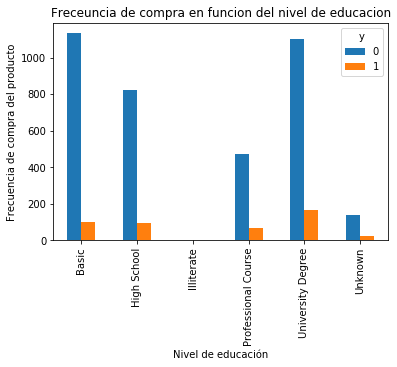

In [14]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")#un diagrama de barras entre educacion y la info de si compro o no
plt.title("Freceuncia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educación")
plt.ylabel("Frecuencia de compra del producto")
#siendo 1 los que compran

Segun el autor del curso, parece que la educacion es un factor clave para comprar o no. **university degree son quienes mas compran** seguidos por los niveles de educacion descentes.

Sin embargo aunque tiene razon a mi personalmente me parece que los datos no son muy buenos para predecir. Por si sola la varaible no es efectiva, aunque si tiene algo de peso (un buen peso)

Text(0, 0.5, 'Proporcion de clientes')

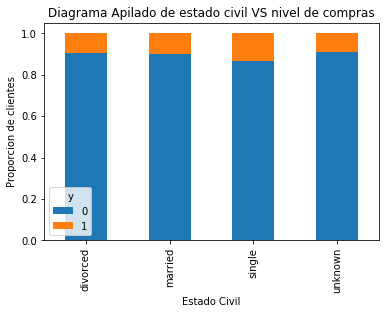

In [15]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked="True") #divido la suma de todos los valores de marital
#creo un diagrama de datos apilados
plt.title("Diagrama Apilado de estado civil VS nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporcion de clientes")

Y si no hacemos la division? **Esa division la hicimos para dejar valores entre 0 y 1 y crear una proporcion, muy util para comparar**

Text(0, 0.5, 'Proporcion de clientes')

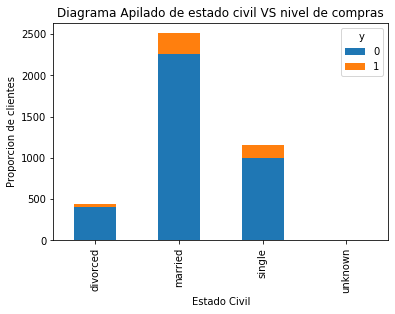

In [16]:
table = pd.crosstab(data.marital, data.y)
table.plot(kind="bar", stacked="True") #divido la suma de todos los valores de marital
#creo un diagrama de datos apilados
plt.title("Diagrama Apilado de estado civil VS nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporcion de clientes")

De esta ultima manera **no podemos comparar** ya que el valor de casado esta muy por encima

El estado civil parece NO incidir en la decision de compra

#### **Dias de la semana vs compras**

Revisaremos si hay dias de la semana donde se compre mas que otros.

Text(0, 0.5, 'Frecuencia de compra del producto')

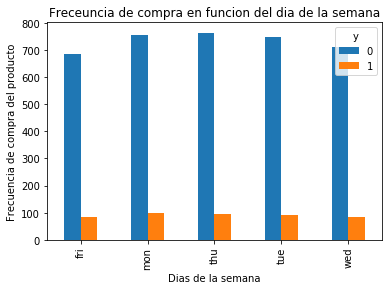

In [17]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")#un diagrama de barras entre educacion y la info de si compro o no
plt.title("Freceuncia de compra en funcion del dia de la semana")
plt.xlabel("Dias de la semana")
plt.ylabel("Frecuencia de compra del producto")

los dias de la semana **NO inciden sobre la decision de compra**

Si queremos la información apilada (en porcentaje de 0 a 1), pues asi: 

Text(0, 0.5, 'Proporcion de clientes')

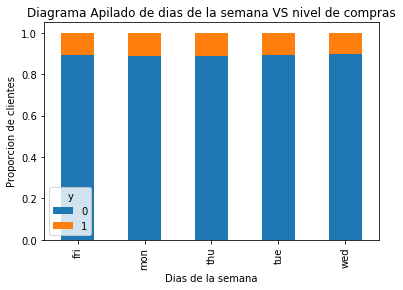

In [18]:
%matplotlib inline
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked="True")
#creo un diagrama de datos apilados
plt.title("Diagrama Apilado de dias de la semana VS nivel de compras")
plt.xlabel("Dias de la semana")
plt.ylabel("Proporcion de clientes")

#### Mes vs compras


Text(0, 0.5, 'Proporcion de clientes')

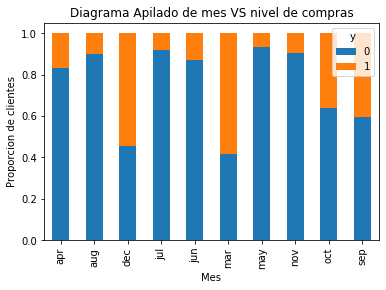

In [19]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked="True")
#creo un diagrama de datos apilados
plt.title("Diagrama Apilado de mes VS nivel de compras")
plt.xlabel("Mes")
plt.ylabel("Proporcion de clientes")

En diciembre y marzo hay mas posibilidades de compra **al parecer** pero no sabemos si **hay menos datos?** . Por eso **vamos a hacer el grafico sin stacked (sin apilar) y sin dividir**

Text(0, 0.5, 'Proporcion de clientes')

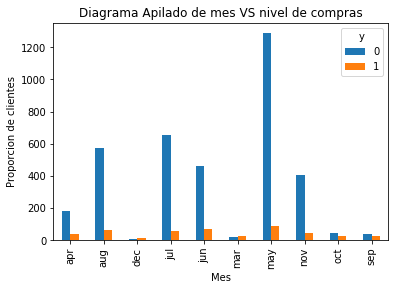

In [20]:
table = pd.crosstab(data.month, data.y)
table.plot(kind="bar", stacked=False)
#creo un diagrama de datos apilados
plt.title("Diagrama Apilado de mes VS nivel de compras")
plt.xlabel("Mes")
plt.ylabel("Proporcion de clientes")

**NOTA**
Resulto ser importante pero por lo contrario. Los meses que la gente mas rechaza o bien los meses donde las campañas son mas intensas

#### Edad vs las compras

Text(0, 0.5, 'Cliente')

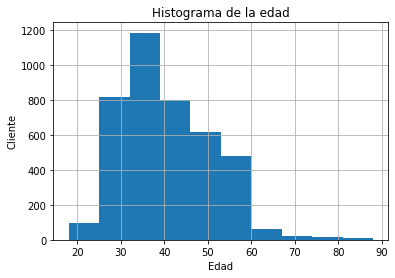

In [21]:
%matplotlib inline
data.age.hist()
plt.title("Histograma de la edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

La mayoria esta entre los 25-30 y 40 años

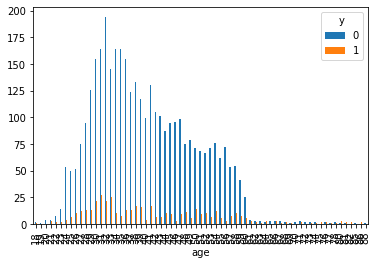

In [22]:
pd.crosstab(data.age, data.y).plot(kind="bar")

Este grafico por si solo dice poco, pero teniendo ambos podemos ver que nuestra hipotesis es correcta y los compradores estan entre 25 y 40 años

#### poutcome vs frecuencia de compra
poutcome es -> frecuencia de compras anteriores (exito, fracaso en inversiones pasadas, no registro)
Revisaremos que tanto influye si les va bien o mal o nunca antes invirtieron para que vuelvan a hacerlo

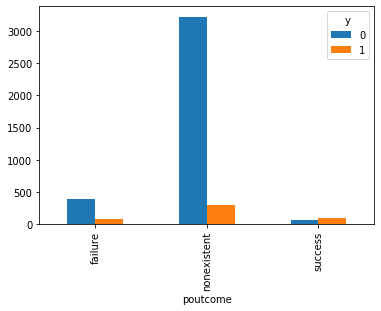

In [23]:
pd.crosstab(data.poutcome, data.y).plot(kind="bar")

Segun este grafico los que les ha ido bien vuelven a invertir. Es raro que los que fallan vuelvan a invertir. Si no existente, pues normal es decir que no

### **Cuales son las buenas varaibles entonces?**
Segun este analisis (aunque puedes seguir y pintar todas y cada una) las mejores variables a incluir son:
* educacion
* mes
* edad
* poutcome

## Conversion de las varaibles categoricas a Dummies

In [24]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

print(data)
for category in categories:
    cat_list =  "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

      age            job   marital            education  default  housing  \
0      30    blue-collar   married                Basic       no      yes   
1      39       services    single          High School       no       no   
2      25       services   married          High School       no      yes   
3      38       services   married                Basic       no  unknown   
4      47         admin.   married    University Degree       no      yes   
5      32       services    single    University Degree       no       no   
6      32         admin.    single    University Degree       no      yes   
7      41   entrepreneur   married    University Degree  unknown      yes   
8      31       services  divorced  Professional Course       no       no   
9      35    blue-collar   married                Basic  unknown       no   
10     25       services    single                Basic  unknown      yes   
11     36  self-employed    single                Basic       no       no   

**NOTA** El nombre "default" de una de nuestras columnas nos da muchos problema. Se puede convertir en un campo de 0's y 1's o simplemente borrarla

In [25]:
data_vars = data.columns.values.tolist() #todas esas columnas que tengo las meto en una lista
#son las variables de todo el  conjunto de datos

In [26]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in to_keep if v not in ["default"]] #elimina default

In [27]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [28]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]#separo la columna a predecir de todo el resto de variables

## Seleccion de rasgos para el modelo

In [29]:
n = 12 #selecciono 12 varaibles para usar en el modelo

In [30]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()# create and configure model. Valores de solver y max_iter son para
#que no nos muestre error con nuevas versiones
# el modelo no logra converger con 1000 iteraciones asi que se debe subir el valor predeterminado
# solver="lbfgs", max_iter=2000

In [32]:
rfe = RFE(lr,n) #modelo y numero de variables a elegir
rfe.fit(bank_data[X], bank_data[Y].values.ravel())#variables predictoras , variable a predecir. como es una columna le saco
#los valores con ravel

C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=12, step=1, verbose=0)

**INFORMACION SOBRE LOS SOLVERS:** https://stackoverflow.com/questions/52640386/how-do-i-solve-the-future-warning-min-groups-self-n-splits-warning-in y como hacer desaparecer ese warning (probamos ya en nuestro ejercicio )

Lo que tengo en bank_data son todas las columnas con las variables dummie. Cree una variable dummie para cada dia de la semana por ejemplo. Hacer esto manual seria un caos

In [33]:
bank_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


In [34]:
print(rfe.support_)

[False False False False  True False False False  True False False False
  True False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
  True False False False False False False  True False  True]


**Eso nos muestra cuales se deben quedar adentro y cuales no**

Veamos el ranking de las variables (su puntuacion)

In [35]:
print(rfe.ranking_)

[33 38 19 43  1 12 26 25  1 37 23  3  1 36  2 39  1  5 32 30 11 45 20 42
 29 47 41 34 46 13 14  8  9  6 21 22 15 16 18  4 31 24  1  1  1  1  1 17
  1 44 35 27 40 28 10  1  7  1]


In [36]:
bank_data_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_High School',
 'education_Illiterate',
 'education_Professional Course',
 'education_University Degree',
 'education_Unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'contact_cellular',
 'contact_telephone',
 'month_apr',
 'month_aug',
 'month_dec',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed',
 'poutcome_failure',

In [37]:
z= zip(bank_data_vars, rfe.support_, rfe.ranking_) #unimos todo esto para revisar varaibles, si entra o no y puntaje

In [38]:
list(z)

[('age', False, 33),
 ('duration', False, 38),
 ('campaign', False, 19),
 ('pdays', False, 43),
 ('previous', True, 1),
 ('emp.var.rate', False, 12),
 ('cons.price.idx', False, 26),
 ('cons.conf.idx', False, 25),
 ('euribor3m', True, 1),
 ('nr.employed', False, 37),
 ('y', False, 23),
 ('job_admin.', False, 3),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', False, 36),
 ('job_housemaid', False, 2),
 ('job_management', False, 39),
 ('job_retired', True, 1),
 ('job_self-employed', False, 5),
 ('job_services', False, 32),
 ('job_student', False, 30),
 ('job_technician', False, 11),
 ('job_unemployed', False, 45),
 ('job_unknown', False, 20),
 ('marital_divorced', False, 42),
 ('marital_married', False, 29),
 ('marital_single', False, 47),
 ('marital_unknown', False, 41),
 ('education_Basic', False, 34),
 ('education_High School', False, 46),
 ('education_Illiterate', False, 13),
 ('education_Professional Course', False, 14),
 ('education_University Degree', False, 8),
 ('education_U

In [39]:
cols = ["previous", "euribor3m", "job_blue-collar", "job_retired", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "month_nov", "day_of_week_wed", "poutcome_nonexistent"] 
#en nuestro ejercicio hicimos un bulce que trai todos estos datos automaticamente

In [40]:
X = bank_data[cols]
Y = bank_data["y"]

#### **NOTA IMPORTANTE ==========================================================**
Cambio cosas de este desarrollo en un ejercicio realizado por mi, en el cual:
* la columna default se incluye como 's y 1's
* se utiliza la nueva sintaxis pra LinearRegresion()
    * solver="lbfgs"
    * maxiter= mayor a 1000
* se crea un bucle automatico para los True
**Encuentra el desarrollo en: _python-ml-curso/notebooks/MisEjercicios/[MIO]T5 - 3 - Logistic Regression - Implementación con Python_**


## Implementación del modelo en Python con statsmodel.api

In [41]:
import statsmodels.api as sm

In [42]:
logit_model = sm.Logit(Y,X)#paso al modelo las Y a predecir y las variables predictoras X
#Logit se refiere a un modelo LOGISTICO

In [43]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.291770
         Iterations 7


In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 4119
Model:                          Logit   Df Residuals:                     4107
Method:                           MLE   Df Model:                           11
Date:                Thu, 15 Aug 2019   Pseudo R-squ.:                  0.1554
Time:                        20:11:44   Log-Likelihood:                -1201.8
converged:                       True   LL-Null:                       -1422.9
Covariance Type:            nonrobust   LLR p-value:                 6.449e-88
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
previous                -0.1229      0.070     -1.755      0.079      -0.260       0.014
euribor3m               -0.6049      0.038    -15.788      0.000      -0.680      -0.530
job_blue-collar         -0.5032      0.152     -3.314      0.001      -0.801      -0.206
job_retired              0.2235      0.219      1.021      0.307      -0.206       0.653
month_aug                0.6048      0.176      3.437      0.001       0.260       0.950
month_dec                1.1358      0.449      2.528      0.011       0.255       2.016
month_jul                1.0327      0.191      5.407      0.000       0.658       1.407
month_jun                1.0775      0.175      6.149      0.000       0.734       1.421
month_mar                1.6448      0.314      5.241      0.000       1.030       2.260
month_nov                0.3828      0.195      1.963      0.050       0.001       0.765
day_of_week_wed         -0.0649      0.139     -0.466      0.641      -0.338       0.208
poutcome_nonexistent    -0.7753      0.122     -6.349      0.000      -1.015      -0.536
========================================================================================
"""

In [45]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.155     
Dependent Variable:   y                 AIC:               2427.6025 
Date:                 2019-08-15 20:11  BIC:               2503.4828 
No. Observations:     4119              Log-Likelihood:    -1201.8   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       6.4492e-88
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.1229   0.0700  -1.7545 0.0793 -0.2601  0.0144
euribor3m            -0.6049   0.0383 -15.7882 0.0000 -0.6800 -0.5298
job_blue-collar      -0.5032   0.1519  -3.3136 0.0009 -0.8009 -0.2056
job_retired           0.2235   0.2191   1.0205 0.3075 -0.2058  0.6529
month_aug             0.6048   0.1759   3.4374 0.0006  0.2600  0.9497
month_dec             1.1358   0.4493   2.5281 0.0115  0.2552  2.0163
month_jul             1.0327   0.1910   5.4071 0.0000  0.6584  1.4070
month_jun             1.0775   0.1752   6.1493 0.0000  0.7341  1.4210
month_mar             1.6448   0.3139   5.2407 0.0000  1.0297  2.2600
month_nov             0.3828   0.1950   1.9634 0.0496  0.0007  0.7649
day_of_week_wed      -0.0649   0.1391  -0.4665 0.6409 -0.3375  0.2077
poutcome_nonexistent -0.7753   0.1221  -6.3492 0.0000 -1.0147 -0.5360
=====================================================================

"""

### **Importante: Sobre sckit-learn y statsmodel**
El metodo de sckit-learn es mas recomendable para crear el modelo final, mientras que el metodo de statsmodel es mejor para irlo entrenando, cacharreando


**NOTA:** Cabe recordar que entre mas pequeño el pvalor (P>|z|) mas importante es el dato para el modelo

## Implementación del modelo en Python con scikit-learn

In [46]:
from sklearn import linear_model #linear? pues si! correcto ya veras que si tienen que ver

In [47]:
logit_model = linear_model.LogisticRegression() #en sklearn primero creamos el modelo y luego lo ajustamos
logit_model.fit(X,Y)#primero predictoras y luego a predecir

C:\Users\luisb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
logit_model.score(X,Y) #valor muy alto eso es muy bueno

0.8963340616654528

In [49]:
Y.mean()#solo el 11% de la gente compra

0.10949259529011895

In [50]:
1-Y.mean() #nuestro modelo lo hace unas milesimas mejor que hacerlo como a dedo decir ay este si, este no

0.8905074047098811

In [51]:
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5076571354812364]
1,euribor3m,[-0.5464961320824984]
2,job_blue-collar,[-0.3591553621658464]
3,job_retired,[0.35603838879578487]
4,month_aug,[0.6253983086780905]
5,month_dec,[1.1822172986015733]
6,month_jul,[0.9622633628078153]
7,month_jun,[1.0543179249091499]
8,month_mar,[1.6306366297878787]
9,month_nov,[0.4519576818464002]


lo anterior es el logaritmo de consicentes de probabilidades (la funcion del logaritmo).
Cada una tiene un peso en el modelo positivo o negativo. Por ejemplo si compro en jun aumento probabilidades, si trabajo como "retirado" aunmento probabilidades en 0.356

## Validacion del modelo logistico

Hemos realizado esto con todo el conjunto de datos, pero lo normal es dividir datos entre entrenamiento y testig.
Vamos a hacer dicha revision del modelo

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.3, random_state=0)
#conjunto de testing del 30%, recuerda que usamos esto en nuestro ejercicio de IA en la UNAD
#ahora ya tenemos todas esas 4 variables llenas

In [54]:
lm = linear_model.LogisticRegression(solver="liblinear")
#el default eliblinear (para compatibilidad con proximas versiones)
lm.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

**NOTA IMPORTANTE** 
EXPLICAICON PARA LA LINEA ---------------------------------> 
```python
lm = linear_model.LogisticRegression(solver="liblinear")```
Se pone solver="liblinear" para garantizar compatibilidad con futuras versiones y obtener el mismo resultado

https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [55]:
probs = lm.predict_proba(X_test) #para predecir las probabilidades del conjunto de test

Lo anterior nos arroja la probabilidad estandar. **Es decir que tanto podemos estar seguros de una respuesta positiva tanto como la negativa**

In [56]:
from IPython.display import display, Math, Latex 

In [57]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p >0.5\end{cases}'))

<IPython.core.display.Math object>

Este valor es algo drastico, pero no te preocupes. Podemso definir nuestros propios valores para que los datos sean True,
Para este caso especial donde poco mas del 10% compran es indicado ampliar un poco el margen

In [58]:
probs

array([[0.95462912, 0.04537088],
       [0.83762689, 0.16237311],
       [0.93244632, 0.06755368],
       ...,
       [0.65044408, 0.34955592],
       [0.97383524, 0.02616476],
       [0.57021896, 0.42978104]])

**¿Que tiene probs?**
La primera columna es la probabilidad (cuan seguro estoy de lo que digo)
La segunda columna es la probabilidad del valor de salida (compra o no compra) si esta es superior a 0.5 el resultado es positivo.
* Si es menor que 0.5 es NO compra

In [59]:
prediction = lm.predict(X_test)

In [60]:
prediction #genera valores predictivos con el modelo

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq \varepsilon\\1&si\ p >\varepsilon\end{cases}'))

<IPython.core.display.Math object>

Definimos un epsilon para decidir que valores pasan y cuales no (epsilon = 10% teniendo en cuenta nuestros datos)

Para continuar y ver como aplicar nuestro valor personalizado para que datos van a ser 1 y cuales 0 vamos a quedarnos con la segunda columna de "probs"

In [62]:
prob = probs[:,1]#me quedo con la segunda columna 
prob_df = pd.DataFrame(prob)#formato dataframe (tabilita cool)
threshold = 0.1 #probabilidad que usare, equivale al 10%
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)#ESTO DICE: Donde(probabilidad sea mayor que el 10%
# colocar como Si compra= 1; SI NO compra = 0)
prob_df.head()

,0,prediction
0,0.045371,0
1,0.162373,1
2,0.067554,0
3,0.062144,0
4,0.041582,0


Esto resulta muy importante. **Por ejemplo si nos contacta el banco para saber a quien debe hacerle o no las ventas** Hay que darle un incremento respecto a lo que ellos ya saben.

Ellos ya saben que venden para el 10%, nosotros debemos darle datos mucho mejores

In [63]:
pd.crosstab(prob_df.prediction, columns="count") #revisemos cuantos son 0 = no compran y cuanto son 1= si compran

col_0,count
prediction,
0,846
1,390


In [64]:
390/len(prob_df)#31% ---> hemos logrado incrementar la estimacion de compradores

0.3155339805825243

Con un treshold del 10% pues resultara muy agresivo. Lo ideal es presentar varias estimaciones al cliente como 
15%

In [65]:
threshold = 0.15 #probabilidad que usare, equivale al 10%
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)#ESTO DICE: Donde(probabilidad sea mayor que el 10%
# colocar como Si compra= 1; SI NO compra = 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,905
1,331


Aqui baja algo, no mucho la verdad

In [66]:
331/len(prob_df)#26%

0.26779935275080907

Con un tresholder mas agresivo (que es lo que hacen los bancos) tenemos:

In [67]:
threshold = 0.05 
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)#ESTO DICE: Donde(probabilidad sea mayor que el 5%
# colocar como Si compra= 1; SI NO compra = 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,504
1,732


In [68]:
732/len(prob_df)#60%

0.5922330097087378

#### Comprobar la eficacia del modelo
Para ello podemos utilizar el framwork de sklearn **metrics** muy util para este tipo de comparaciones de eficacia

In [69]:
from sklearn import metrics

In [70]:
metrics.accuracy_score(Y_test, prediction)#usamos los datos de test con las predicciones del modelo

0.9004854368932039

El resultado es que acertamos en el 90% de los casos (tanto para si como para no).

**Utilizando los datos de test nuestra probabilidad subio un poquito pasando del 89% al 90%** Esto gracias al uso de datos de entrenamiento y validacion

## Validacion cruzada
Se lleva a cabo cuanto intentamos hacer una prediccion para idcentificar como de bien se comporta el modelo y es capaz de generalizar los resultados. De modo que sea independiente del Dataset utilizado.

Es requerida para hacer que el modelo no sufra de **overfitting** o sobre ajuste, es decir que solo sirva con el conjunto de datos para el que fue creado y se comporte mal con otros

In [82]:
from sklearn.model_selection import cross_val_score, LeaveOneOut

In [78]:
scores = cross_val_score(linear_model.LogisticRegression(solver="liblinear"),X,Y, scoring="accuracy",  cv=10)
#le paso definicion del modelo logistico (solver para conservar mismo comportamiento en proximas versiones)
#predictoras X, a predecir Y. scoring="exactitud" (¿Cuan exacto es?) y cv son el numero de divisiones a ejecutar

In [79]:
scores

array([0.9031477 , 0.88834951, 0.90533981, 0.89563107, 0.90048544,
       0.8907767 , 0.88349515, 0.89320388, 0.89537713, 0.88807786])

Lo mas comun es solicitar el promedio

In [81]:
scores.mean()

0.8943884240990478

En este caso podemos concluir que el modelo generaliza bastante bien la informacion 

https://es.wikipedia.org/wiki/Validaci%C3%B3n_cruzada

**Leave one Out Cross Validation**
Como metodo del model_selection
* Con este metodolo solo se toma un valor de cada iteracion. Asi que tienes o 0% de coincidencia o 100%

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

In [85]:
score2 = LeaveOneOut(X,Y)

TypeError: LeaveOneOut() takes no arguments